In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import matplotlib as plt
import geoplot.crs as gcrs
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
national_fips_codes = pd.read_csv('covid_scraper/data/state_fips_codes_2017.csv', dtype=str)
national_fips_codes = national_fips_codes[national_fips_codes['State (FIPS)'] != '00']
national_fips_codes = national_fips_codes.rename(columns={'State (FIPS)': 'st_fips', 'Name': 'st_name'}).drop(columns=['Region', 'Division'])
national_fips_codes

st_fips               st_name
2       09           Connecticut
3       23                 Maine
4       25         Massachusetts
5       33         New Hampshire
6       44          Rhode Island
7       50               Vermont
9       34            New Jersey
10      36              New York
11      42          Pennsylvania
14      17              Illinois
15      18               Indiana
16      26              Michigan
17      39                  Ohio
18      55             Wisconsin
20      19                  Iowa
21      20                Kansas
22      27             Minnesota
23      29              Missouri
24      31              Nebraska
25      38          North Dakota
26      46          South Dakota
29      10              Delaware
30      11  District of Columbia
31      12               Florida
32      13               Georgia
33      24              Maryland
34      37        North Carolina
35      45        South Carolina
36      51              Virginia
37      54         West Virginia
39      01               Alabama
40      21              Kentucky
41      28           Mississippi
42      47             Tennessee
44      05              Arkansas
45      22             Louisiana
46      40              Oklahoma
47      48                 Texas
50      04               Arizona
51      08              Colorado
52      16                 Idaho
53      30               Montana
54      32                Nevada
55      35            New Mexico
56      49                  Utah
57      56               Wyoming
59      02                Alaska
60      06            California
61      15                Hawaii
62      41                Oregon
63      53            Washington

In [3]:
hotspots_recent = pd.read_csv('covid_scraper/exports/midwest_emerging_counties.csv', dtype={'state_fips': 'object', 'fips': 'object'})
hotspots_recent.head()

date state_fips   fips state   county  cases  deaths  pop_2019  \
0  2020-04-10         19  19179  Iowa  Wapello      3       0   34969.0   
1  2020-03-28         19  19179  Iowa  Wapello      1       0   34969.0   
2  2020-04-04         19  19179  Iowa  Wapello      1       0   34969.0   
3  2020-04-03         19  19179  Iowa  Wapello      1       0   34969.0   
4  2020-04-02         19  19179  Iowa  Wapello      1       0   34969.0   

   cases_p_100k  deaths_p_100k  latitude  longitude  cases_daily_pct_change  \
0           8.6            0.0   41.0313   -92.4095                     0.5   
1           2.9            0.0   41.0313   -92.4095                     0.0   
2           2.9            0.0   41.0313   -92.4095                     0.0   
3           2.9            0.0   41.0313   -92.4095                     0.0   
4           2.9            0.0   41.0313   -92.4095                     0.0   

   deaths_daily_pct_change  cases_weekly_pct_change  deaths_weekly_pct_change  \
0                      NaN                 0.484975                       NaN   
1                      NaN                 0.484975                       NaN   
2                      NaN                 0.484975                       NaN   
3                      NaN                 0.484975                       NaN   
4                      NaN                 0.484975                       NaN   

    date_only                                                map abbrev  
0  2020-04-10  ![](https://static.startribune.com/news/projec...     IA  
1  2020-03-28  ![](https://static.startribune.com/news/projec...     IA  
2  2020-04-04  ![](https://static.startribune.com/news/projec...     IA  
3  2020-04-03  ![](https://static.startribune.com/news/projec...     IA  
4  2020-04-02  ![](https://static.startribune.com/news/projec...     IA

In [4]:
hotspot_states = hotspots_recent[['state_fips', 'state']].drop_duplicates()
hotspot_states

state_fips         state
0            19          Iowa
45           27     Minnesota
83           31      Nebraska
174          18       Indiana
313          17      Illinois
655          55     Wisconsin
765          46  South Dakota
1205         26      Michigan
4253         38  North Dakota

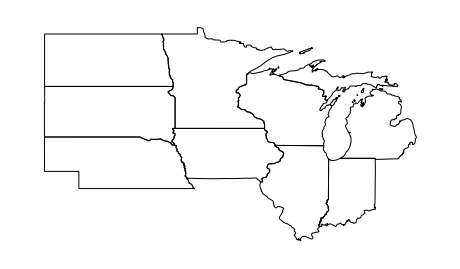

In [5]:
# contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
# gplt.polyplot(contiguous_usa)
state_shorelines = gpd.read_file("/Users/Coreymj/Documents/GIS/natural_earth/ne_10m_admin_1_states_provinces_lakes/ne_10m_admin_1_states_provinces_lakes.shp")
state_shorelines = state_shorelines[(state_shorelines['iso_a2'] == 'US') & (state_shorelines['name'].isin(hotspot_states['state']))]
# state_shorelines.crs
# state_shorelines = state_shorelines.to_crs("EPSG:26915")
# state_shorelines.crs
gplt.polyplot(state_shorelines)

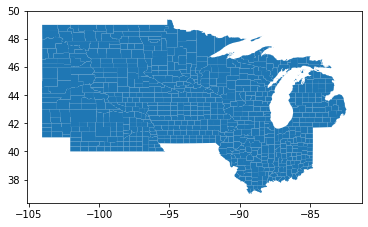

In [6]:
# counties = gpd.read_file("/Users/Coreymj/Documents/GIS/usa/tl_2019_us_county/tl_2019_us_county.shp")
counties = gpd.read_file("/Users/Coreymj/Documents/GIS/usa/USA County Shorelines/usa_county_shorelines_update.shp", dtype={'FIPS': str})
counties['FIPS'] = counties['FIPS'].astype(str)
counties['FIPS'] = counties['FIPS'].str.pad(width=5, side='left', fillchar='0')
# counties.dtypes
# counties['full_fips'] = counties.STATEFP + counties.COUNTYFP
counties['st_fips'] = counties['FIPS'].str[0:2]
counties['cty_fips'] = counties['FIPS'].str[2:]
counties.dtypes
counties = counties.rename(columns={'FIPS': 'full_fips', 'NAME': 'cty_name'})
counties = counties.merge(national_fips_codes,
                         how="left",
                         on="st_fips")
# counties
# counties[~counties['st_name'].isnull()].to_file("covid_scraper/data/shp/usa_county_shorelines/usa_county_shorelines.shp")

hotspot_state_counties = counties[counties['st_fips'].isin(hotspot_states.state_fips)]
hotspot_state_counties
hotspot_state_counties.plot()


In [7]:
state_srids = {
    'Minnesota': 26992, # 26915,
    'Iowa': 26915,
    'Wisconsin': 3071, # 26916,
    'Illinois': 26916,
    'Michigan': 26916,
    'Indiana': 26916,
    'North Dakota': 26914,
    'South Dakota': 26914,
    'Nebraska': 26914,
}

In [46]:
from PIL import Image, ImageChops
import numpy as np

def crop_and_scale(full_fips, square_size):
    infile = 'covid_scraper/exports/locator_maps/county_{}.png'.format(full_fips)
    
    pil_image = Image.open(infile)
    np_array = np.array(pil_image)
    blank_px = [255, 255, 255, 0]
    mask = np_array != blank_px
    coords = np.argwhere(mask)
    x0, y0, z0 = coords.min(axis=0)
    x1, y1, z1 = coords.max(axis=0) + 1
    cropped_box = np_array[x0:x1, y0:y1, z0:z1]
    new_image = Image.fromarray(cropped_box, 'RGBA')
#     print(new_image.width, new_image.height)
    
    # make a square
    if new_image.width == new_image.height:
        square = new_image
    elif new_image.width > new_image.height:
        square = Image.new(new_image.mode, (new_image.width, new_image.width))
        square.paste(new_image, (0, (new_image.width - new_image.height) // 2))
    else:
        square = Image.new(new_image.mode, (new_image.height, new_image.height))
        square.paste(new_image, ((new_image.height - new_image.width) // 2, 0))
        
    square.resize((square_size, square_size), Image.LANCZOS)
    
    outfile = 'covid_scraper/exports/locator_maps/cropped/county_{}.png'.format(full_fips)
    square.save(outfile)

143 95
77 139
91 139
143 95
143 67
143 87
129 139
123 139
121 139
77 139
121 139
143 95
121 139
91 139
121 139
123 139
143 67
121 139
143 95
121 139
143 67
129 139
143 95
143 91
143 67
121 139
143 87
129 139
121 139
91 139
121 139
129 139
143 91
123 139
123 139
143 91
143 87
91 139
143 95
123 139
121 139
121 139
123 139
143 87
143 95
91 139
143 67
123 139
143 91
77 139
77 139
91 139
143 95
143 67
143 87
143 87
143 67
143 67
121 139
143 95
143 91
77 139
91 139
123 139
143 67
143 91
129 139
143 91
143 95
143 95
143 67
143 91
129 139
77 139
143 87
143 87
129 139
143 67
143 95
143 67
143 91
77 139
143 95
121 139
129 139
143 91
123 139
77 139
91 139
143 95
123 139
77 139
91 139
143 95
121 139
123 139
143 67
143 87
143 87
143 95
143 67
143 95
77 139
143 91
121 139
143 67
121 139
143 95
143 67
143 67
143 95
121 139
123 139
129 139
123 139
77 139
121 139
77 139
91 139
143 91
129 139
143 95
77 139
91 139
143 95
123 139
143 67
143 91
143 95
123 139
77 139
91 139
143 95
121 139
143 91
77 139
143 

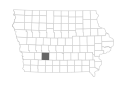

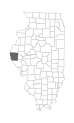

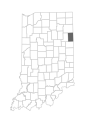

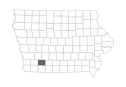

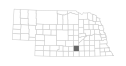

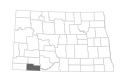

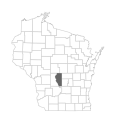

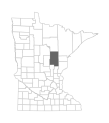

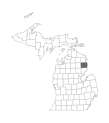

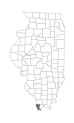

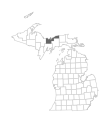

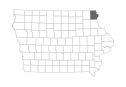

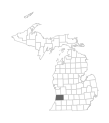

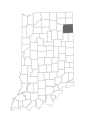

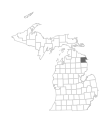

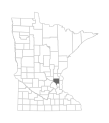

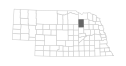

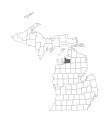

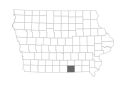

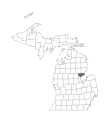

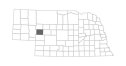

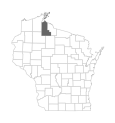

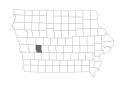

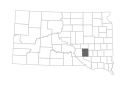

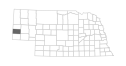

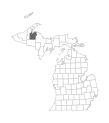

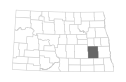

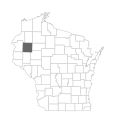

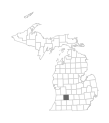

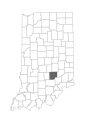

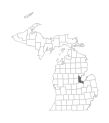

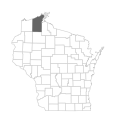

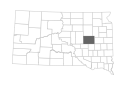

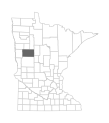

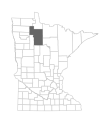

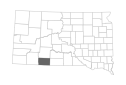

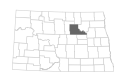

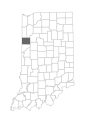

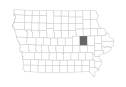

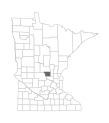

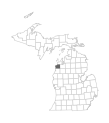

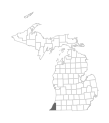

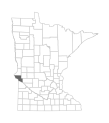

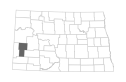

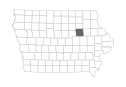

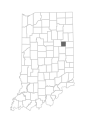

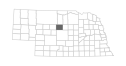

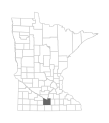

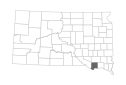

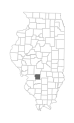

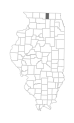

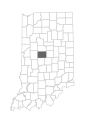

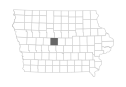

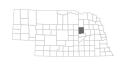

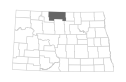

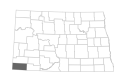

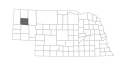

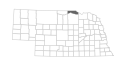

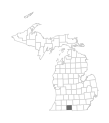

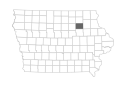

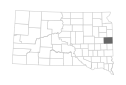

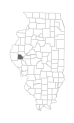

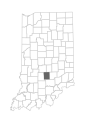

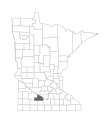

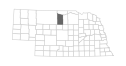

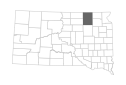

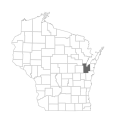

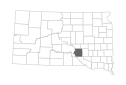

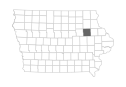

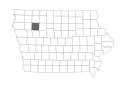

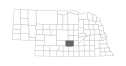

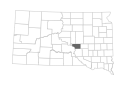

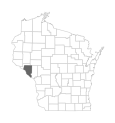

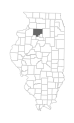

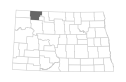

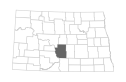

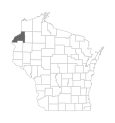

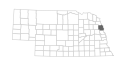

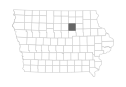

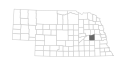

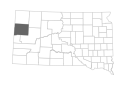

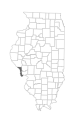

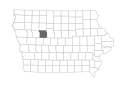

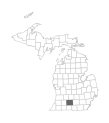

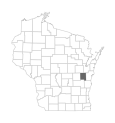

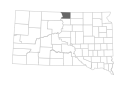

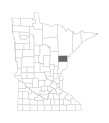

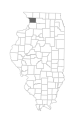

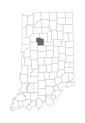

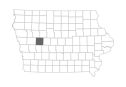

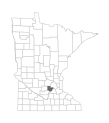

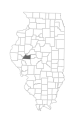

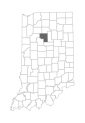

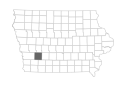

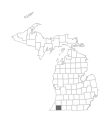

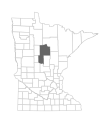

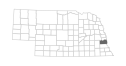

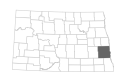

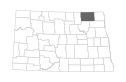

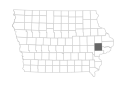

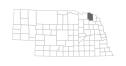

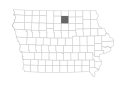

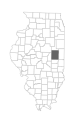

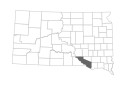

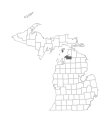

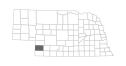

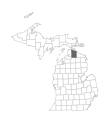

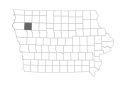

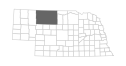

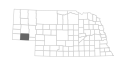

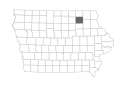

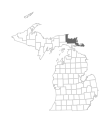

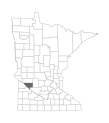

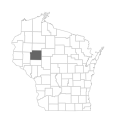

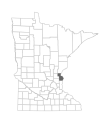

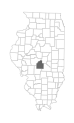

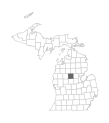

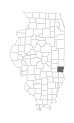

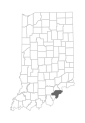

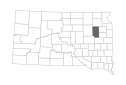

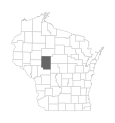

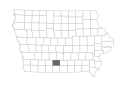

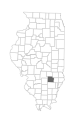

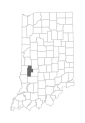

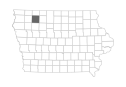

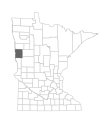

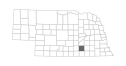

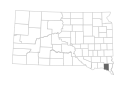

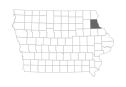

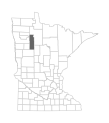

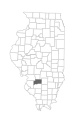

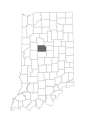

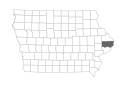

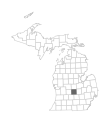

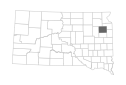

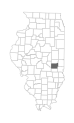

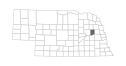

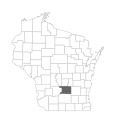

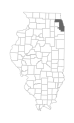

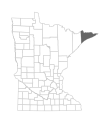

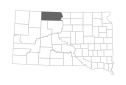

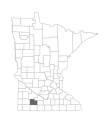

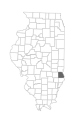

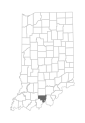

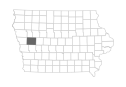

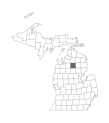

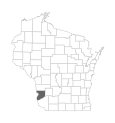

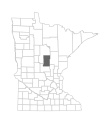

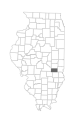

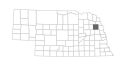

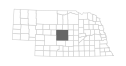

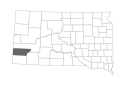

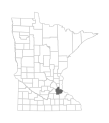

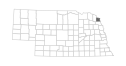

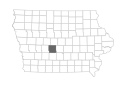

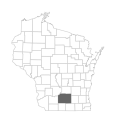

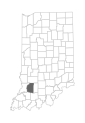

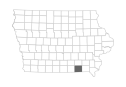

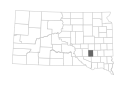

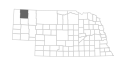

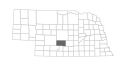

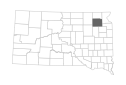

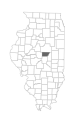

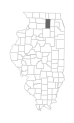

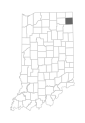

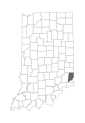

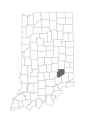

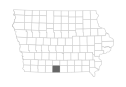

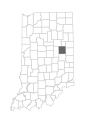

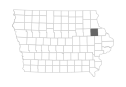

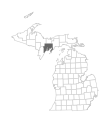

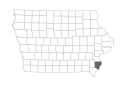

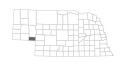

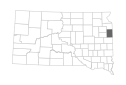

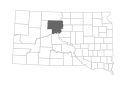

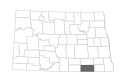

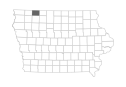

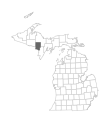

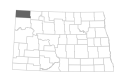

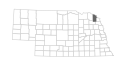

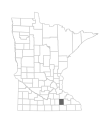

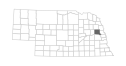

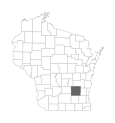

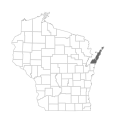

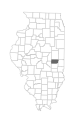

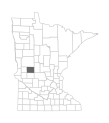

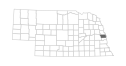

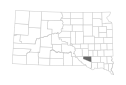

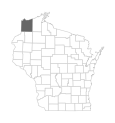

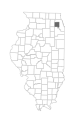

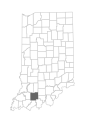

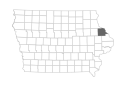

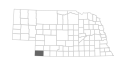

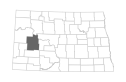

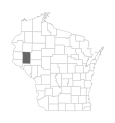

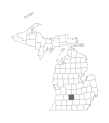

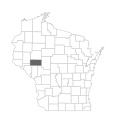

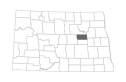

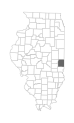

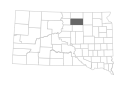

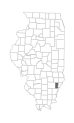

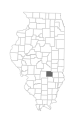

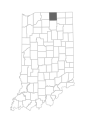

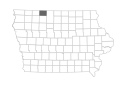

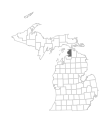

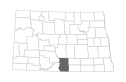

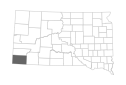

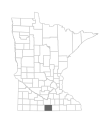

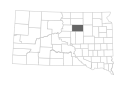

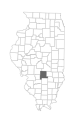

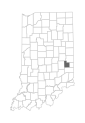

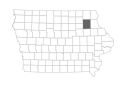

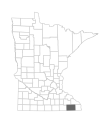

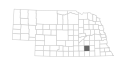

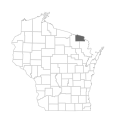

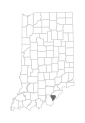

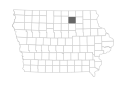

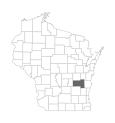

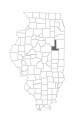

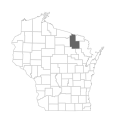

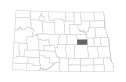

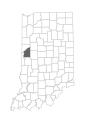

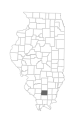

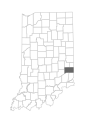

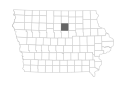

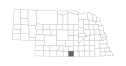

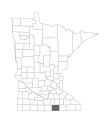

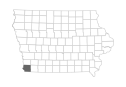

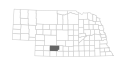

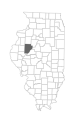

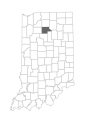

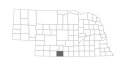

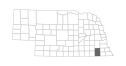

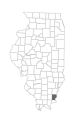

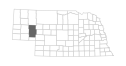

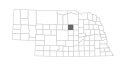

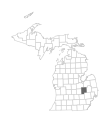

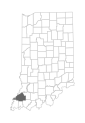

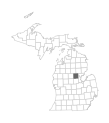

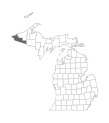

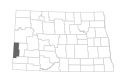

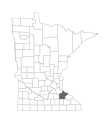

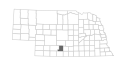

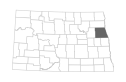

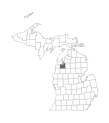

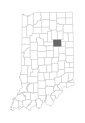

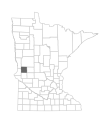

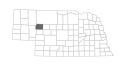

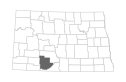

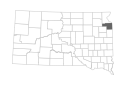

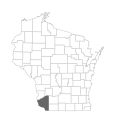

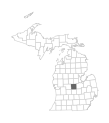

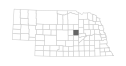

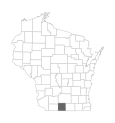

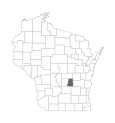

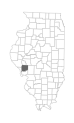

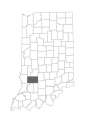

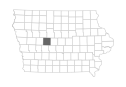

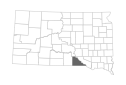

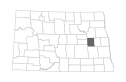

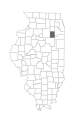

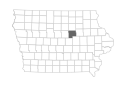

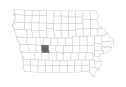

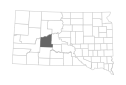

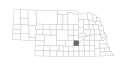

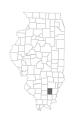

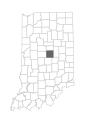

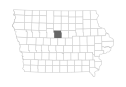

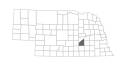

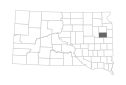

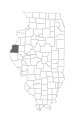

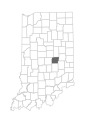

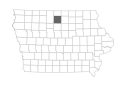

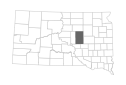

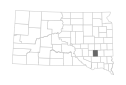

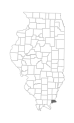

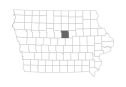

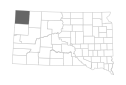

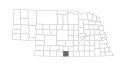

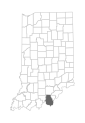

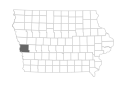

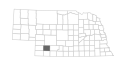

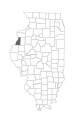

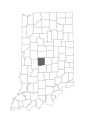

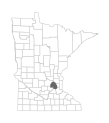

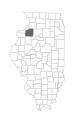

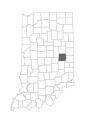

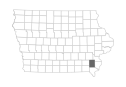

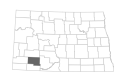

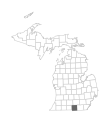

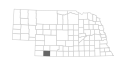

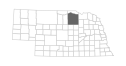

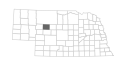

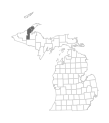

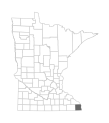

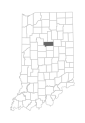

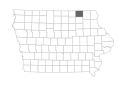

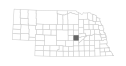

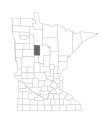

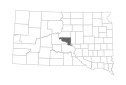

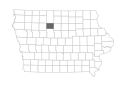

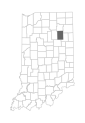

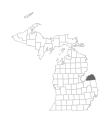

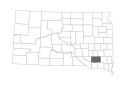

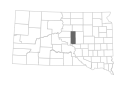

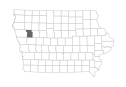

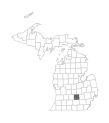

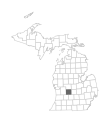

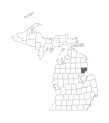

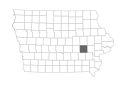

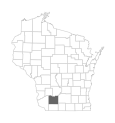

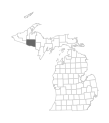

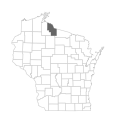

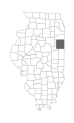

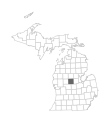

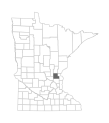

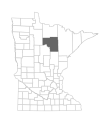

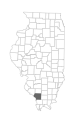

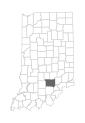

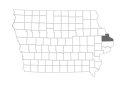

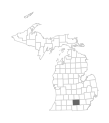

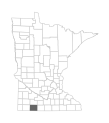

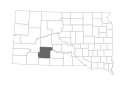

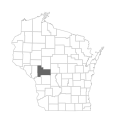

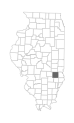

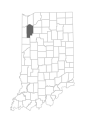

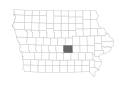

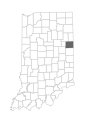

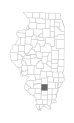

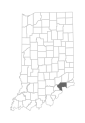

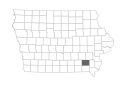

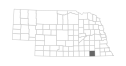

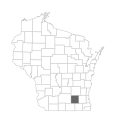

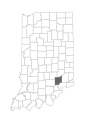

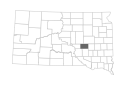

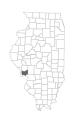

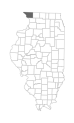

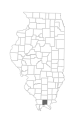

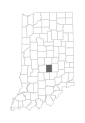

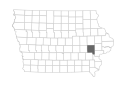

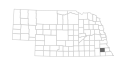

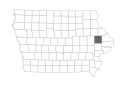

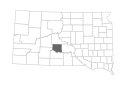

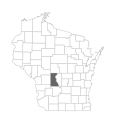

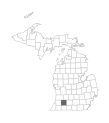

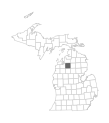

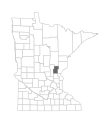

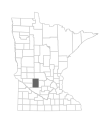

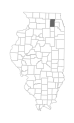

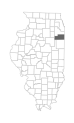

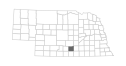

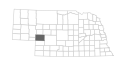

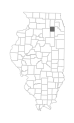

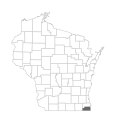

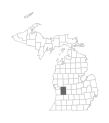

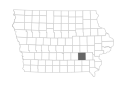

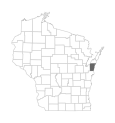

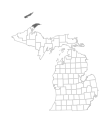

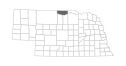

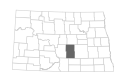

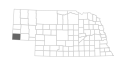

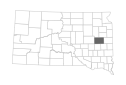

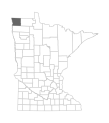

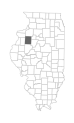

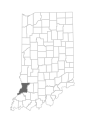

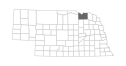

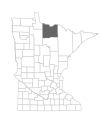

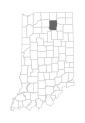

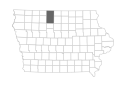

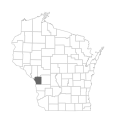

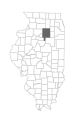

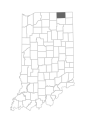

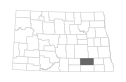

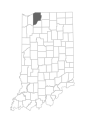

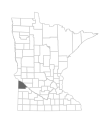

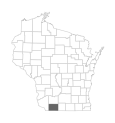

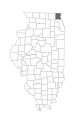

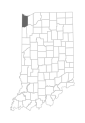

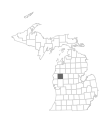

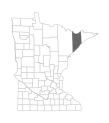

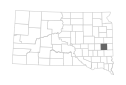

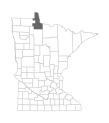

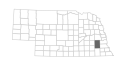

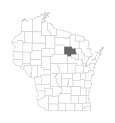

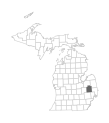

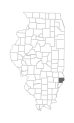

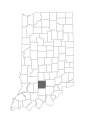

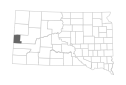

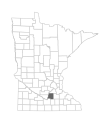

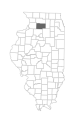

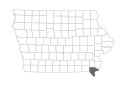

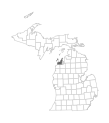

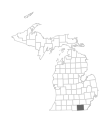

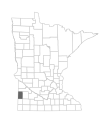

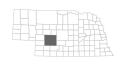

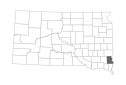

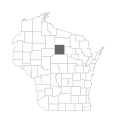

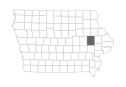

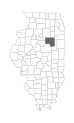

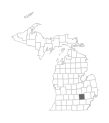

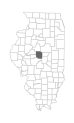

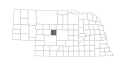

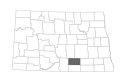

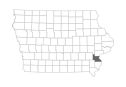

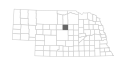

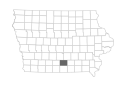

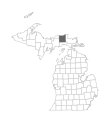

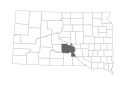

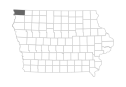

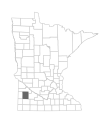

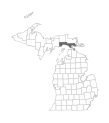

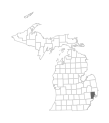

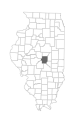

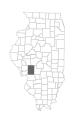

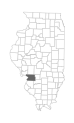

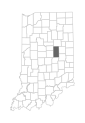

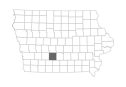

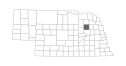

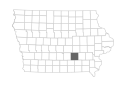

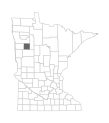

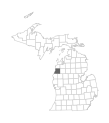

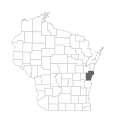

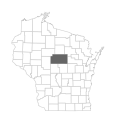

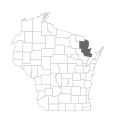

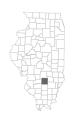

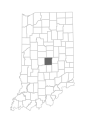

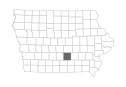

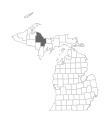

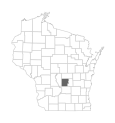

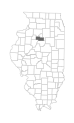

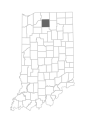

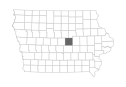

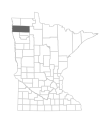

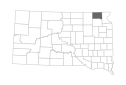

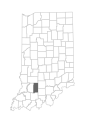

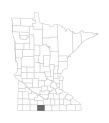

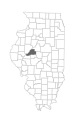

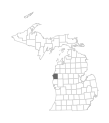

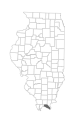

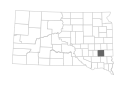

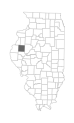

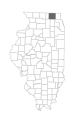

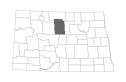

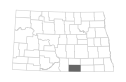

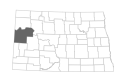

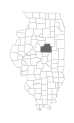

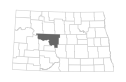

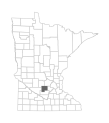

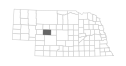

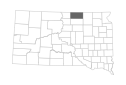

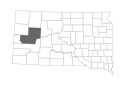

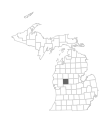

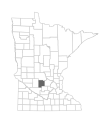

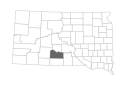

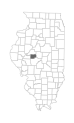

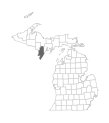

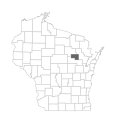

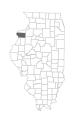

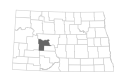

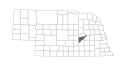

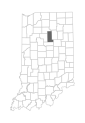

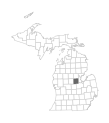

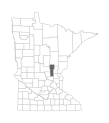

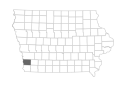

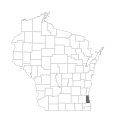

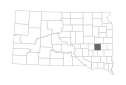

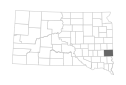

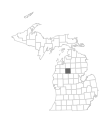

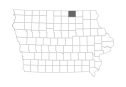

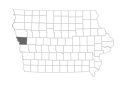

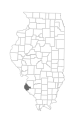

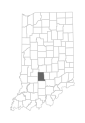

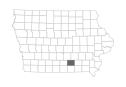

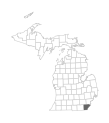

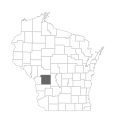

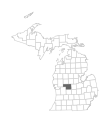

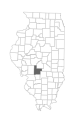

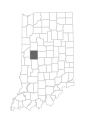

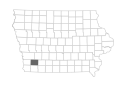

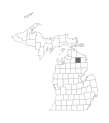

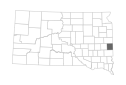

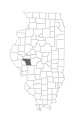

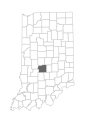

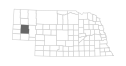

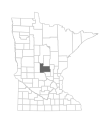

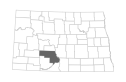

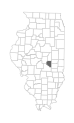

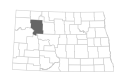

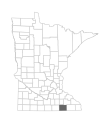

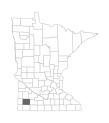

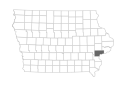

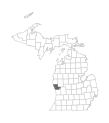

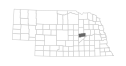

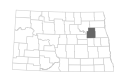

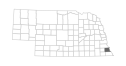

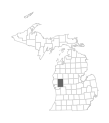

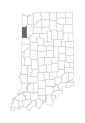

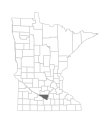

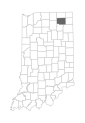

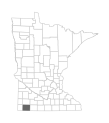

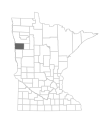

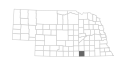

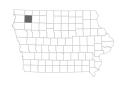

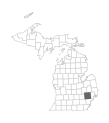

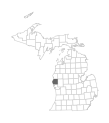

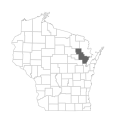

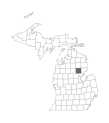

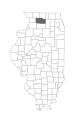

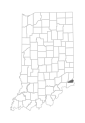

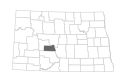

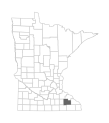

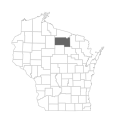

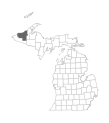

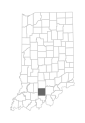

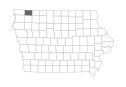

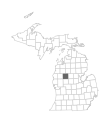

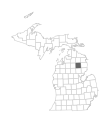

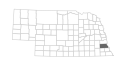

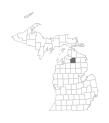

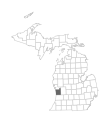

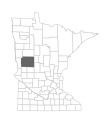

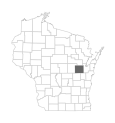

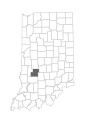

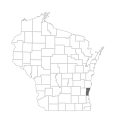

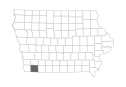

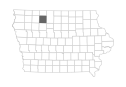

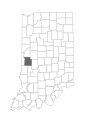

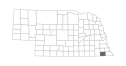

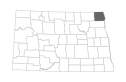

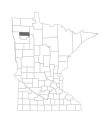

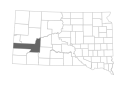

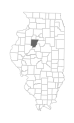

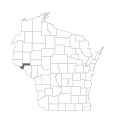

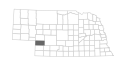

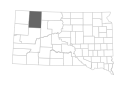

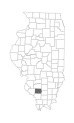

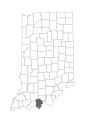

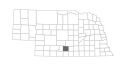

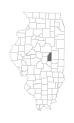

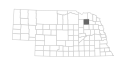

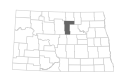

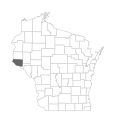

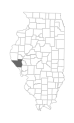

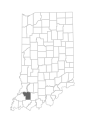

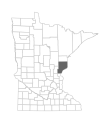

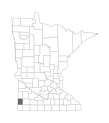

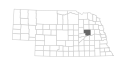

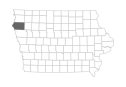

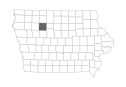

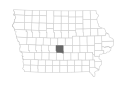

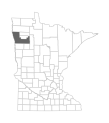

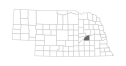

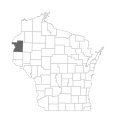

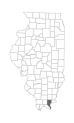

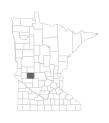

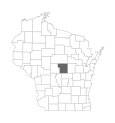

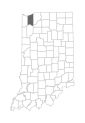

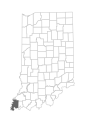

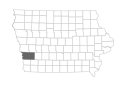

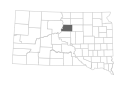

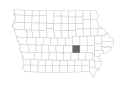

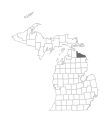

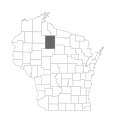

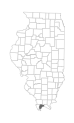

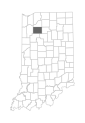

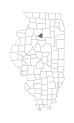

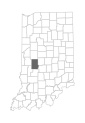

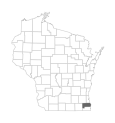

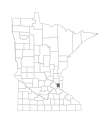

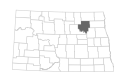

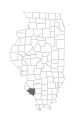

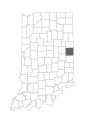

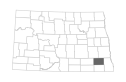

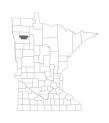

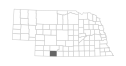

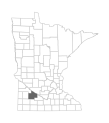

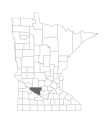

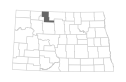

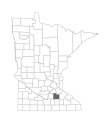

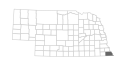

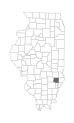

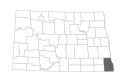

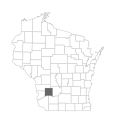

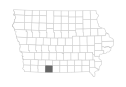

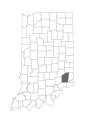

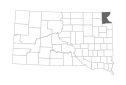

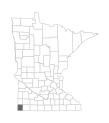

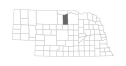

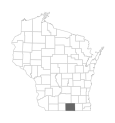

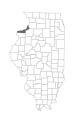

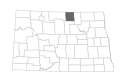

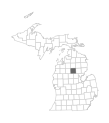

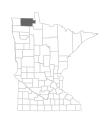

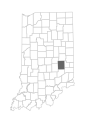

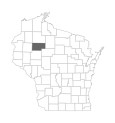

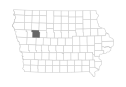

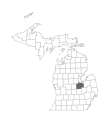

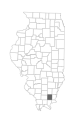

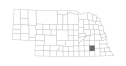

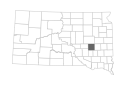

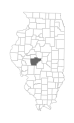

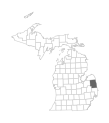

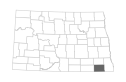

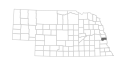

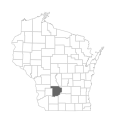

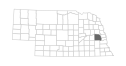

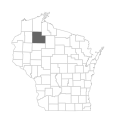

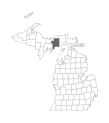

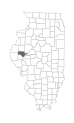

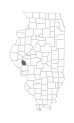

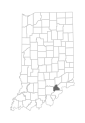

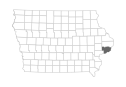

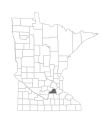

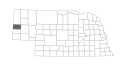

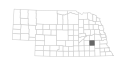

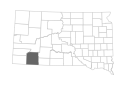

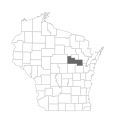

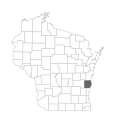

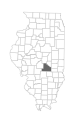

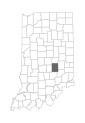

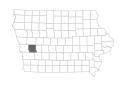

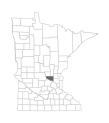

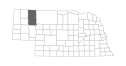

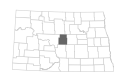

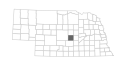

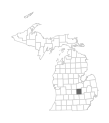

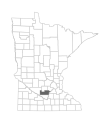

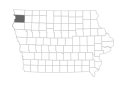

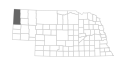

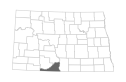

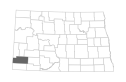

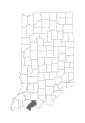

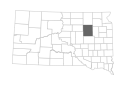

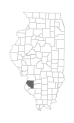

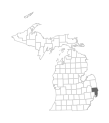

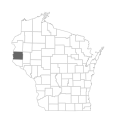

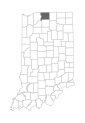

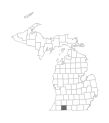

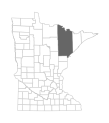

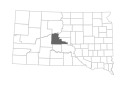

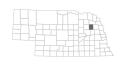

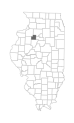

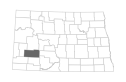

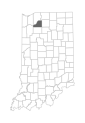

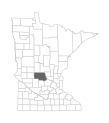

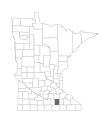

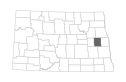

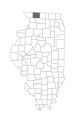

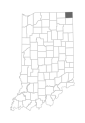

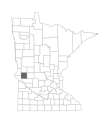

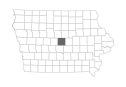

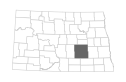

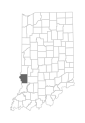

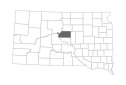

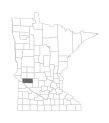

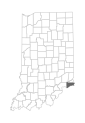

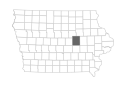

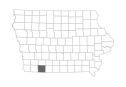

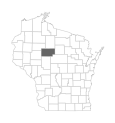

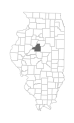

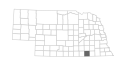

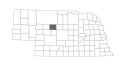

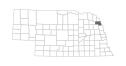

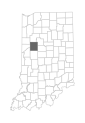

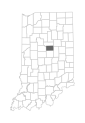

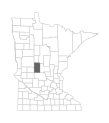

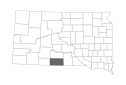

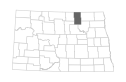

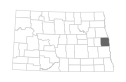

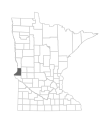

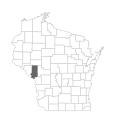

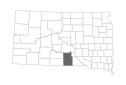

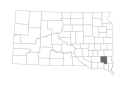

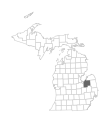

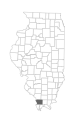

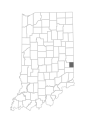

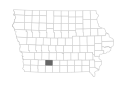

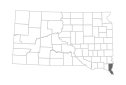

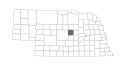

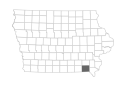

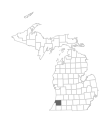

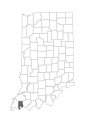

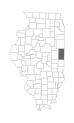

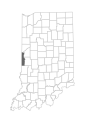

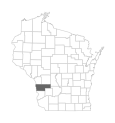

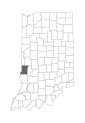

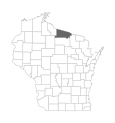

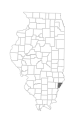

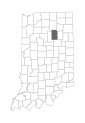

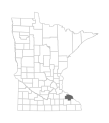

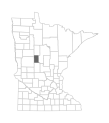

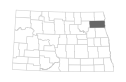

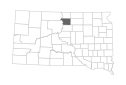

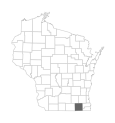

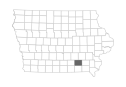

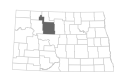

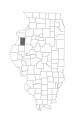

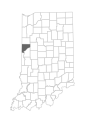

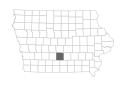

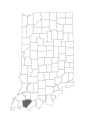

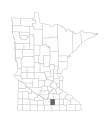

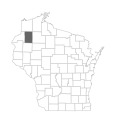

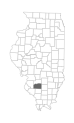

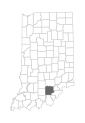

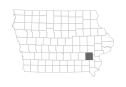

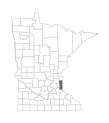

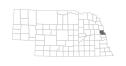

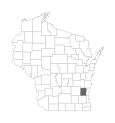

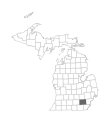

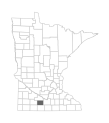

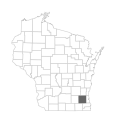

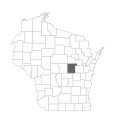

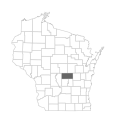

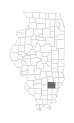

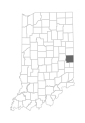

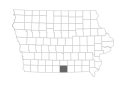

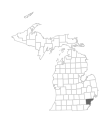

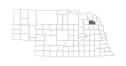

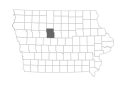

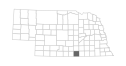

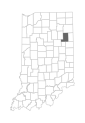

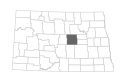

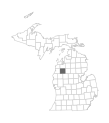

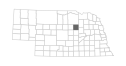

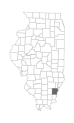

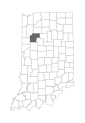

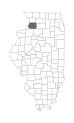

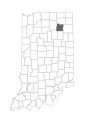

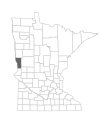

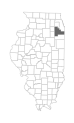

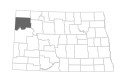

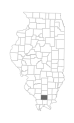

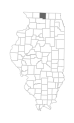

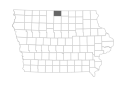

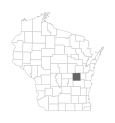

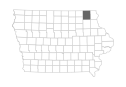

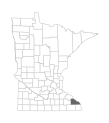

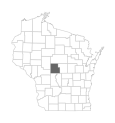

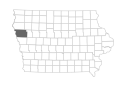

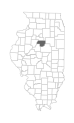

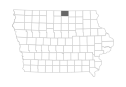

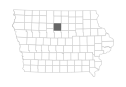

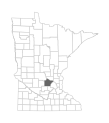

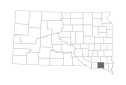

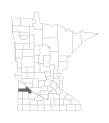

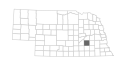

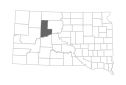

In [48]:
# for c in hotspots_recent[['state_fips', 'fips', 'state', 'county']].drop_duplicates().iterrows():
for c in hotspot_state_counties.iterrows():  # All counties in those states, might as well
    proj = 'EPSG:{}'.format(state_srids[c[1]['st_name']])
    all_county_shp = hotspot_state_counties[hotspot_state_counties['st_fips'] == c[1]['st_fips']].to_crs(proj)
    county_shp = all_county_shp[all_county_shp['full_fips'] == c[1]['full_fips']]  

    base = all_county_shp.plot(color='white', edgecolor='#CCCCCC', linewidth=0.5, figsize=(2, 2))
    outmap = county_shp.plot(ax=base, color='#666666')
    outmap.axis('off')

    outmap.figure.savefig(
        'covid_scraper/exports/locator_maps/county_{}.png'.format(c[1]['full_fips']),
        transparent=True,
        figsize=(2, 2),
        dpi=100
    )
    crop_and_scale(c[1]['full_fips'], 100)
    